# Moving Average Model
* Performed on the Residuals of the Forecasted Models


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tsa.ar_model import AR


In [2]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
# Lag 1 Variable. Also Called Naive (Persistence) model
df['t'] = df.Temp.shift(1)

In [5]:
# Residual Variable
df['Resid'] = df.Temp - df.t

In [23]:
# Storing the Original Data to Comapre with Predicted data
test_y = df.Temp[df.shape[0]-7:]

In [6]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [10]:
# Perform Auto Regression on Residual Data
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [11]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [12]:
model = AR(train)
model_fit = model.fit()

In [13]:
model_fit.k_ar # 29 Lagged variables are Imp for This Regression

29

In [14]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [18]:
pred_resid = model_fit.predict(start = len(train), end=len(train)+len(test)-1)
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [16]:
# Adding the Forecasted residuals to the Naive (Presistence) model Predictions
predictions = df.t[df.shape[0]-7:] + pred_resid

In [17]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error

In [24]:
mse2 = mean_squared_error(test_y, predictions)
mse2

2.049398556648206

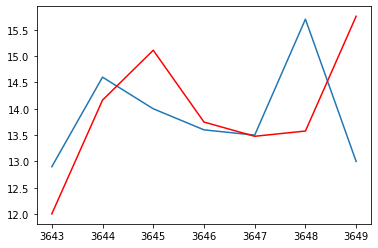

In [25]:
plt.plot(test_y)
plt.plot(predictions, color='red')

In [30]:
# we can also Perform walk forward validations on Moving Average model. Lets see How to do it
import numpy as np

In [31]:
data = train
predicts = []
for t in test:
    model_ar = AR(data)
    model_ar_fit = model_ar.fit()
    y=model_ar_fit.predict(start=len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predicts.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

2.0049858425321685
0.9007669667698284
-0.10790330155538844
-0.4129967255686147
-0.06698282159521794
0.13478963796208898
-0.7612472304688896


In [32]:
mse3 = mean_squared_error(test,predicts)
mse3

1.3867283048389802

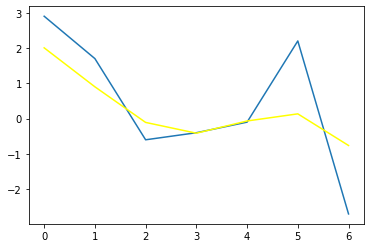

In [34]:
plt.plot(test.values)
plt.plot(predicts, color='yellow')